In [1]:
! wget https://www.seattleix.net/statistics/six_agg_bits_1min.rrd -O Traffic-Dataset/six_dataset.rrd

--2020-04-25 18:56:48--  https://www.seattleix.net/statistics/six_agg_bits_1min.rrd
Resolving www.seattleix.net (www.seattleix.net)...3.20.148.210, 3.16.240.102, 3.135.181.230, ...
Connecting to www.seattleix.net (www.seattleix.net)|3.20.148.210|:443...connected.
HTTP request sent, awaiting response...200 OK
Length: 1187488 (1.1M) [application/octet-stream]
Saving to: ‘Traffic-Dataset/six_dataset.rrd’

Traffic-Dataset/six 100%[===================>]   1.13M  1.57MB/s    in 0.7s    

2020-04-25 18:56:49 (1.57 MB/s) - ‘Traffic-Dataset/six_dataset.rrd’ saved [1187488/1187488]



In [2]:
! rrdtool dump Traffic-Dataset/six_dataset.rrd Traffic-Dataset/six_dataset.xml

! python Traffic-Dataset/rrdcsv.py Traffic-Dataset/six_dataset.xml 0 > Traffic-Dataset/six_dataset.csv

In [3]:
import datetime
import time
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

HISTORY_DAYS = 7
AVG_SECONDS = 60

In [4]:
df = pd.read_csv(r'Traffic-Dataset/six_dataset.csv', index_col=0)

df.index = pd.to_datetime(df.index, unit='s')
print(df.shape)
df.head(5)

(11000, 2)


,ds0,ds1
2020-04-18 03:37:00,1.843850e+11,1.849988e+11
2020-04-18 03:38:00,1.874075e+11,1.863802e+11
2020-04-18 03:39:00,1.869505e+11,1.873443e+11
2020-04-18 03:40:00,1.859477e+11,1.865102e+11
2020-04-18 03:41:00,1.855964e+11,1.859192e+11


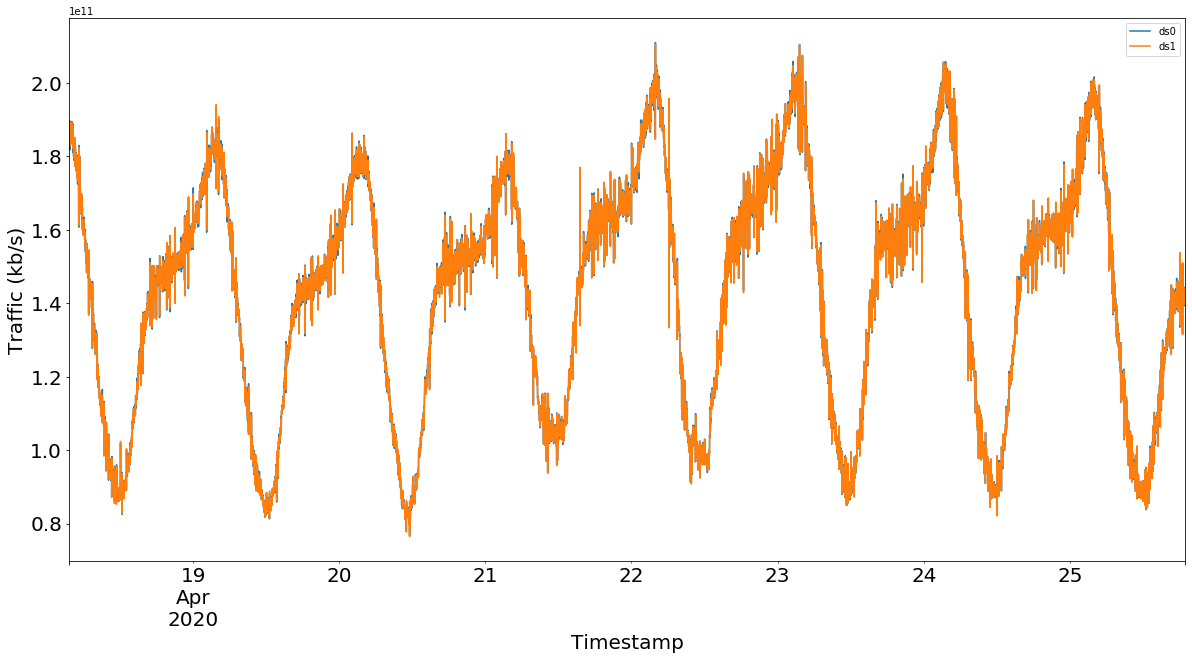

In [5]:
ax = df.plot(figsize=(20,10), fontsize=20)
ax.set_xlabel("Timestamp", fontsize=20)
ax.set_ylabel("Traffic (kb/s)", fontsize=20)
fig = ax.get_figure()

In [6]:
_DATARATE_MIN, _DATARATE_MAX = 0, 2000

'''
Interpolate data points to a certain range
'''
def interpolate_array(values, min=_DATARATE_MIN, max=_DATARATE_MAX):
    return np.interp(values, (values.min(), values.max()), (min, max))

df = pd.read_csv(r'Traffic-Dataset/six_dataset.csv', index_col=0)

df.index = pd.to_datetime(df.index, unit='s')
df = df.drop('ds1', axis=1)

df['sent'] = interpolate_array(df['ds0'])
df = df.drop('ds0', axis=1)

print(df.shape)
df.head(5)

(11000, 1)


,sent
2020-04-18 03:37:00,1603.571914
2020-04-18 03:38:00,1648.586550
2020-04-18 03:39:00,1641.780541
2020-04-18 03:40:00,1626.845381
2020-04-18 03:41:00,1621.613132


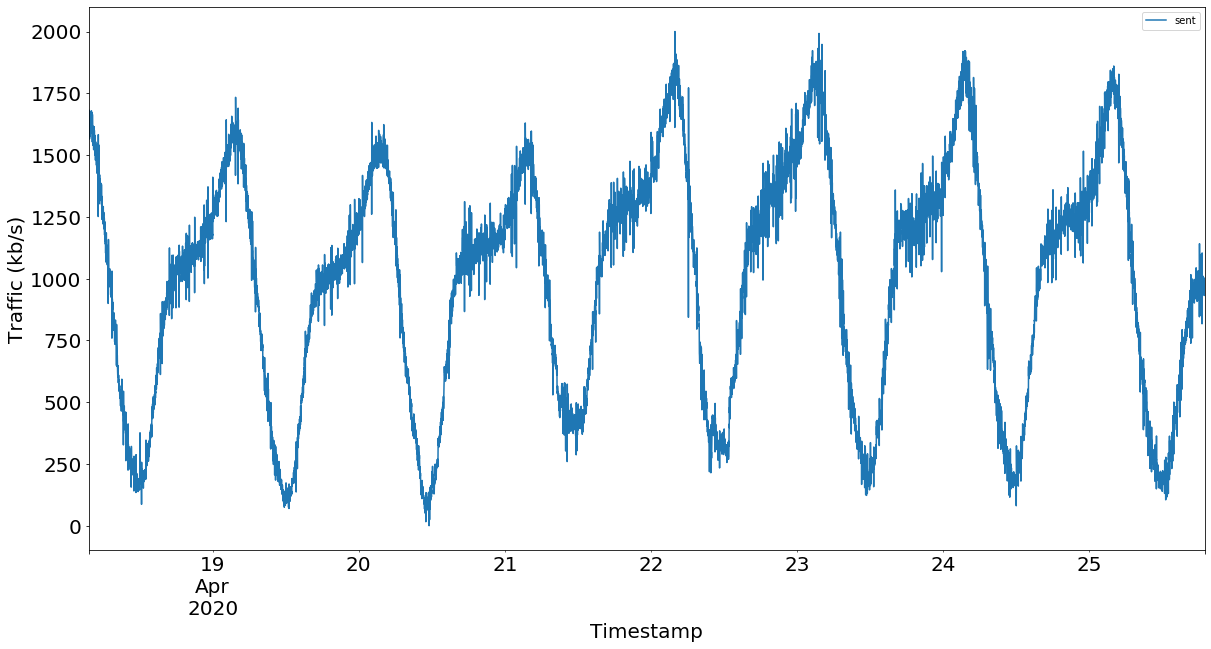

In [7]:
ax = df.plot(figsize=(20,10), fontsize=20)
ax.set_xlabel("Timestamp", fontsize=20)
ax.set_ylabel("Traffic (kb/s)", fontsize=20)
fig = ax.get_figure()


In [8]:
# Save Dataframe
df.to_csv('./data/dataset_six_traffic.csv')

In [9]:
df['ds0']
df = df[:2880]

print(df.shape)
df.head(5)

KeyError: 'ds0'

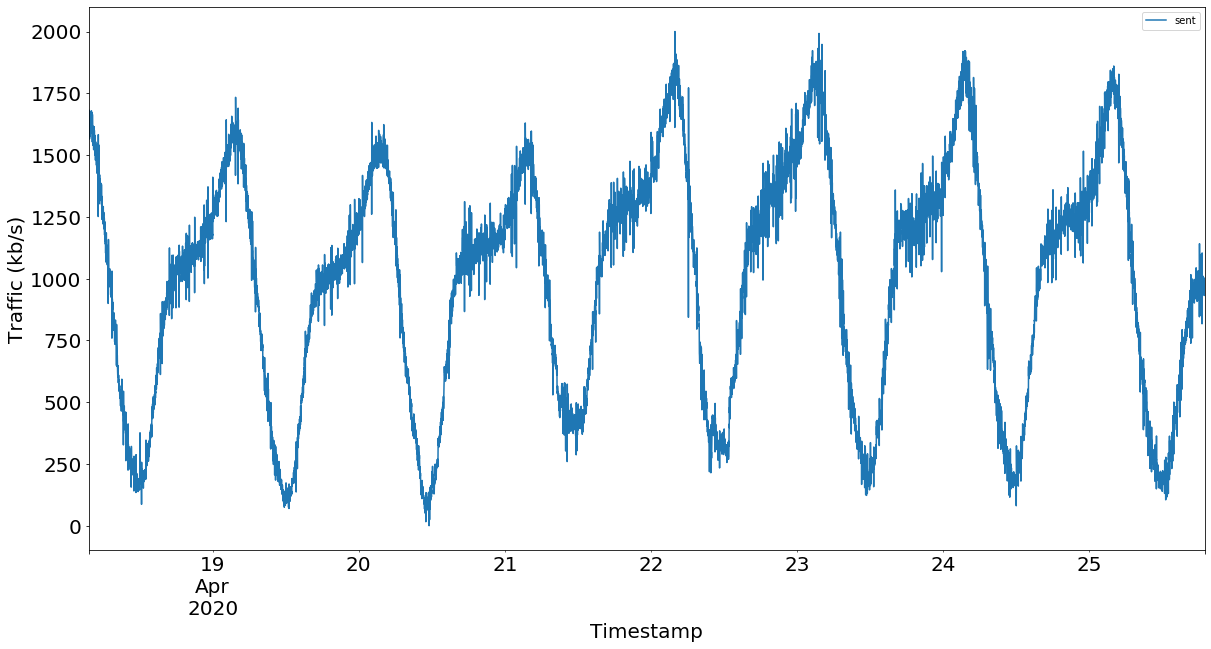

In [10]:
ax = df.plot(figsize=(20,10), fontsize=20)
ax.set_xlabel("Timestamp", fontsize=20)
ax.set_ylabel("Traffic (kb/s)", fontsize=20)
fig = ax.get_figure()